<a href="https://colab.research.google.com/github/pypratikyesankar9/NLP_demystified/blob/main/Named_entity_final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy

from sklearn import metrics
from sklearn import model_selection
from sklearn.datasets import fetch_20newsgroups
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

from sklearn.svm import SVC


In [26]:
## loading the Dataset
data = pd.read_csv("ner_dataset.csv",encoding="latin1" )

In [27]:
##Dimension check
print(data.head())
print()
data.shape

    Sentence #           Word  POS Tag
0  Sentence: 1      Thousands  NNS   O
1          NaN             of   IN   O
2          NaN  demonstrators  NNS   O
3          NaN           have  VBP   O
4          NaN        marched  VBN   O



(1048575, 4)

In [28]:
##Identifying missing values
data.isnull().sum()

Sentence #    1000616
Word               10
POS                 0
Tag                 0
dtype: int64

**Data Preprocessing**

In [29]:
data = data.fillna(method='ffill')

data['Sentence #'].nunique(), data.Word.nunique(), data.Tag.nunique()

(47959, 35177, 17)

In [30]:
data['Sentence #'].nunique(), data.Word.nunique(), data.Tag.nunique()

(47959, 35177, 17)

In [ ]:
data.shape

(1048575, 4)

In [ ]:
#### Optional, will show 1 example with spacy as well
##!pip install -U spacy==3.*
##!python -m spacy download en_core_web_sm
##!python -m spacy info

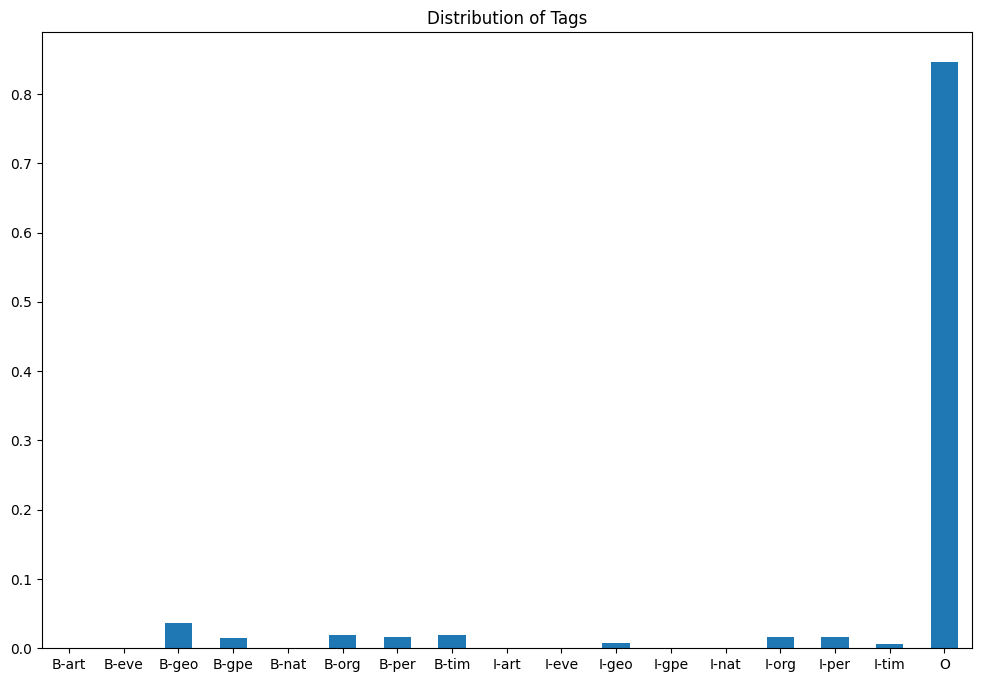

In [ ]:
####Checking the distribution for Tag
bins, counts = np.unique(data.Tag, return_counts=True)
freq_series = pd.Series(counts/len(data))
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_xticklabels(bins, rotation=0)
ax.set_title('Distribution of Tags')
plt.show()

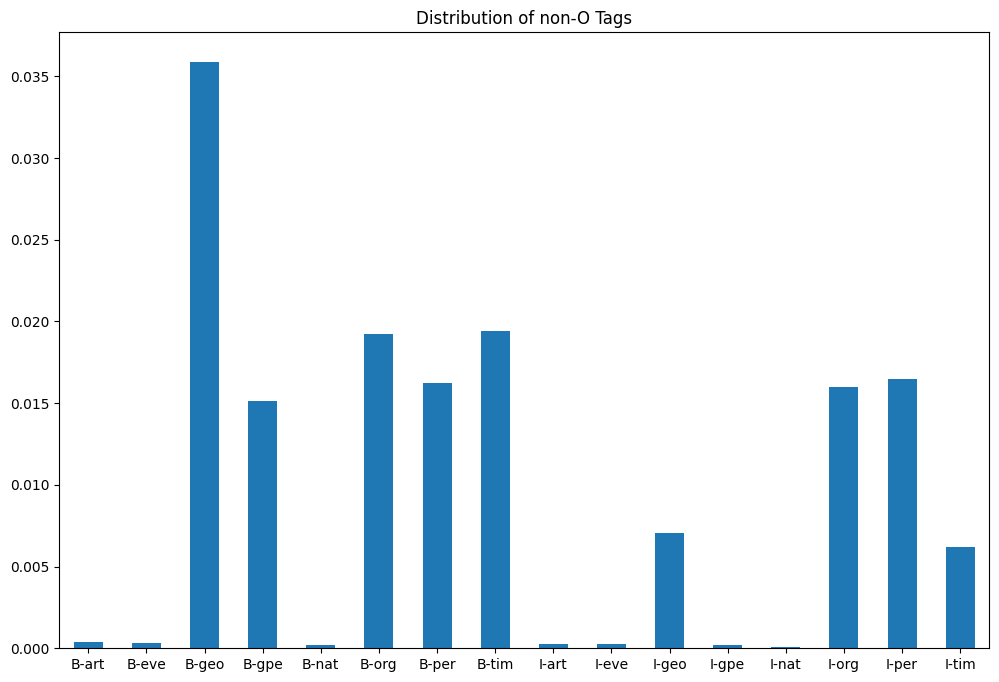

In [ ]:

bins, counts = np.unique(data[data.Tag != 'O'].Tag, return_counts=True)
freq_series = pd.Series(counts/len(data))
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_xticklabels(bins, rotation=0)
ax.set_title('Distribution of non-O Tags')
plt.show()

In [ ]:
data.groupby('Tag').size().reset_index(name='counts').sort_values(by = 'counts', ascending= False)

,Tag,counts
16,O,887908
2,B-geo,37644
7,B-tim,20333
5,B-org,20143
14,I-per,17251
6,B-per,16990
13,I-org,16784
3,B-gpe,15870
10,I-geo,7414
15,I-tim,6528


In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
##Label encoder to create a unique sentence ID
data["Sentence #"] = LabelEncoder().fit_transform(data["Sentence #"] )

In [ ]:

data.head(30)

,Sentence #,Word,POS,Tag
0,0,Thousands,NNS,O
1,47959,of,IN,O
2,47959,demonstrators,NNS,O
3,47959,have,VBP,O
4,47959,marched,VBN,O
5,47959,through,IN,O
6,47959,London,NNP,B-geo
7,47959,to,TO,O
8,47959,protest,VB,O
9,47959,the,DT,O


In [33]:
data.rename(columns={"Sentence #":"sentence_id","Word":"words","Tag":"labels"}, inplace =True)

In [ ]:
##Lower case for words, and upper case for lables
data["labels"] = data["labels"].str.upper()
data["words"] = data["words"].str.lower()




In [ ]:
### Creating Subsets of predictors and target label
X= data[["sentence_id","words"]]
Y =data["labels"]

In [ ]:

#building up train data and test data
train_data = pd.DataFrame({"sentence_id":x_train["sentence_id"],"words":x_train["words"],"labels":y_train})
test_data = pd.DataFrame({"sentence_id":x_test["sentence_id"],"words":x_test["words"],"labels":y_test})

In [ ]:
#### Validation data kept separately for final validation
val_data = test_data.copy()

In [ ]:
X2= train_data[["sentence_id","words"]]
Y2 =train_data["labels"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X2,Y2, test_size =0.2)

In [ ]:

#re building the train data and test data
train_data = pd.DataFrame({"sentence_id":x_train["sentence_id"],"words":x_train["words"],"labels":y_train})
test_data = pd.DataFrame({"sentence_id":x_test["sentence_id"],"words":x_test["words"],"labels":y_test})

In [ ]:
## dimensions of train, test and validation
print(train_data.shape)
print(test_data.shape)
print(val_data.shape)



(671088, 3)
(167772, 3)
(209715, 3)


In [ ]:
del X
del Y
del X2
del Y2


In [ ]:
### Vectorization along with stop words removal
%%time
vectorizer = CountVectorizer(stop_words= "english")

CPU times: user 35 µs, sys: 0 ns, total: 35 µs
Wall time: 38.4 µs


In [ ]:
### Vectorization fited based on train data and same is used to transform test and val data
%%time
x= vectorizer.fit_transform(train_data['words'].values.astype('U'))
x_test = vectorizer.transform(test_data['words'].values.astype('U'))
x_val = vectorizer.transform(val_data['words'].values.astype('U'))

CPU times: user 5.31 s, sys: 120 ms, total: 5.43 s
Wall time: 5.49 s


In [ ]:
y = train_data['labels']
y_test = test_data['labels']
y_val = val_data['labels']

In [ ]:
classes = np.unique(y)
classes = classes.tolist()

**Linear classifier with SGD**

In [ ]:
#training the model
sgd = SGDClassifier()
sgd.partial_fit(x, y, classes)


SGDClassifier()

In [ ]:
#Scoring the model on datasets
y_pred = sgd.predict(x)
y_test_pred = sgd.predict(x_test)
y_val_pred = sgd.predict(x_val)

In [ ]:
print("Train F1-score:", f1_score(y,y_pred,average = "macro"))
print("Test F1-score:", f1_score(y_test,y_test_pred,average = "macro"))
print("Validation F1-score:", f1_score(y_val,y_val_pred,average = "macro"))

Train F1-score: 0.28765913495920076
Test F1-score: 0.28739343386464605
Validation F1-score: 0.28825320714004465


In [ ]:
print(classification_report(y_pred=sgd.predict(x), y_true=y, labels = classes))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-ART       0.00      0.00      0.00       252
       B-EVE       0.00      0.00      0.00       210
       B-GEO       0.82      0.47      0.60     24169
       B-GPE       0.92      0.68      0.78     10169
       B-NAT       0.00      0.00      0.00       134
       B-ORG       0.85      0.20      0.32     12812
       B-PER       0.82      0.40      0.54     10940
       B-TIM       0.89      0.64      0.75     13002
       I-ART       0.00      0.00      0.00       184
       I-EVE       0.00      0.00      0.00       178
       I-GEO       0.79      0.31      0.45      4784
       I-GPE       0.00      0.00      0.00       131
       I-NAT       0.00      0.00      0.00        30
       I-ORG       0.65      0.12      0.20     10604
       I-PER       0.81      0.19      0.30     10917
       I-TIM       0.00      0.00      0.00      4119
           O       0.90      1.00      0.95    568453

    accuracy              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
new_classes = classes.copy()
new_classes.pop()
new_classes


['B-ART',
 'B-EVE',
 'B-GEO',
 'B-GPE',
 'B-NAT',
 'B-ORG',
 'B-PER',
 'B-TIM',
 'I-ART',
 'I-EVE',
 'I-GEO',
 'I-GPE',
 'I-NAT',
 'I-ORG',
 'I-PER',
 'I-TIM']

In [ ]:
print(classification_report(y_pred=sgd.predict(x), y_true=y, labels = new_classes))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-ART       0.00      0.00      0.00       252
       B-EVE       0.00      0.00      0.00       210
       B-GEO       0.82      0.47      0.60     24169
       B-GPE       0.92      0.68      0.78     10169
       B-NAT       0.00      0.00      0.00       134
       B-ORG       0.85      0.20      0.32     12812
       B-PER       0.82      0.40      0.54     10940
       B-TIM       0.89      0.64      0.75     13002
       I-ART       0.00      0.00      0.00       184
       I-EVE       0.00      0.00      0.00       178
       I-GEO       0.79      0.31      0.45      4784
       I-GPE       0.00      0.00      0.00       131
       I-NAT       0.00      0.00      0.00        30
       I-ORG       0.65      0.12      0.20     10604
       I-PER       0.81      0.19      0.30     10917
       I-TIM       0.00      0.00      0.00      4119

   micro avg       0.85      0.37      0.52    102635
   macro avg       0.41   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Naive Bayes classifier**

In [ ]:
##Naive Bayes classifier for multinomial models
nb = MultinomialNB(alpha=0.01)
nb.partial_fit(x, y, classes)


MultinomialNB(alpha=0.01)

In [ ]:
#Scoring the model on datasets
y_pred = nb.predict(x)
y_test_pred = nb.predict(x_test)
y_val_pred = nb.predict(x_val)

In [ ]:
print("Train F1-score:", f1_score(y,y_pred,average = "macro"))
print("Test F1-score:", f1_score(y_test,y_test_pred,average = "macro"))
print("Validation F1-score:", f1_score(y_val,y_val_pred,average = "macro"))

Train F1-score: 0.5086906954845322
Test F1-score: 0.41163096944291777
Validation F1-score: 0.41402026876637693


In [ ]:
print(classification_report(y_pred=y_pred, y_true=y, labels = new_classes))

              precision    recall  f1-score   support

       B-ART       0.92      0.27      0.42       252
       B-EVE       0.68      0.30      0.41       210
       B-GEO       0.81      0.77      0.79     24169
       B-GPE       0.93      0.94      0.94     10169
       B-NAT       0.78      0.24      0.37       134
       B-ORG       0.83      0.40      0.54     12812
       B-PER       0.77      0.76      0.77     10940
       B-TIM       0.88      0.75      0.81     13002
       I-ART       1.00      0.10      0.19       184
       I-EVE       1.00      0.02      0.03       178
       I-GEO       0.76      0.54      0.63      4784
       I-GPE       0.84      0.24      0.38       131
       I-NAT       1.00      0.07      0.12        30
       I-ORG       0.69      0.21      0.32     10604
       I-PER       0.81      0.79      0.80     10917
       I-TIM       0.60      0.09      0.16      4119

   micro avg       0.82      0.64      0.72    102635
   macro avg       0.83   

**Passive aggresive classifier**

In [ ]:
##Passive aggresive

pa =PassiveAggressiveClassifier()
pa.partial_fit(x, y, classes)


PassiveAggressiveClassifier()

In [ ]:
#Scoring the model on datasets
y_pred = pa.predict(x)
y_test_pred = pa.predict(x_test)
y_val_pred = pa.predict(x_val)

In [ ]:
print("Train F1-score:", f1_score(y,y_pred,average = "macro"))
print("Test F1-score:", f1_score(y_test,y_test_pred,average = "macro"))
print("Validation F1-score:", f1_score(y_val,y_val_pred,average = "macro"))

Train F1-score: 0.52249615751443
Test F1-score: 0.4620799884054096
Validation F1-score: 0.47058916311507915


In [ ]:
print(classification_report(y_pred=y_pred, y_true=y, labels = new_classes))

              precision    recall  f1-score   support

       B-ART       0.04      0.30      0.08       265
       B-EVE       0.66      0.28      0.39       210
       B-GEO       0.80      0.77      0.78     24161
       B-GPE       0.92      0.94      0.93     10125
       B-NAT       0.41      0.38      0.39       137
       B-ORG       0.73      0.43      0.55     12900
       B-PER       0.71      0.76      0.73     10901
       B-TIM       0.86      0.72      0.79     13148
       I-ART       0.55      0.14      0.22       187
       I-EVE       0.65      0.07      0.13       157
       I-GEO       0.68      0.55      0.61      4712
       I-GPE       0.63      0.48      0.54       130
       I-NAT       0.56      0.28      0.38        32
       I-ORG       0.56      0.27      0.36     10650
       I-PER       0.78      0.80      0.79     11022
       I-TIM       0.43      0.17      0.24      4183

   micro avg       0.76      0.65      0.70    102920
   macro avg       0.62   

**The results from the first approach are not encouraging , and may more sophisticaded models to be used or a change in approach

**Second approach : Using Sequenctial Conditional Random Field (CRF) model**

In [ ]:
###
!pip install sklearn-crfsuite

In [ ]:
import sklearn_crfsuite
from sklearn_crfsuite import scorers

#Data analysis
import pandas as pd
import numpy as np
#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#Modeling
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn_crfsuite import CRF, scorers, metrics
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import scipy.stats
from itertools import chain

import nltk
import sklearn
import scipy.stats

import sklearn_crfsuite
from sklearn_crfsuite import scorers,CRF
from sklearn_crfsuite.metrics import flat_classification_report
from sklearn_crfsuite import metrics


In [ ]:
data.head()

,sentence_id,words,POS,labels
0,0,Thousands,NNS,O
1,0,of,IN,O
2,0,demonstrators,NNS,O
3,0,have,VBP,O
4,0,marched,VBN,O


In [ ]:
# A class to retrieve the sentences from the dataset
class SentenceGetter(object):

    def __init__(self, dataset, word_col, tag_col, sent_id_col):
        self.n_sent = 1
        self.dataset = dataset
        self.empty = False
        agg_func = lambda s: [
            (w, t) for w,t in zip(s[word_col].values.tolist(), s[tag_col].values.tolist())
        ]
        self.grouped = self.dataset.groupby(sent_id_col).apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [ ]:
%%time

getter = SentenceGetter(dataset=data, word_col='words', tag_col='labels', sent_id_col='sentence_id')
sentences = getter.sentences
print(sentences[0])

[('Thousands', 'O'), ('of', 'O'), ('demonstrators', 'O'), ('have', 'O'), ('marched', 'O'), ('through', 'O'), ('London', 'B-geo'), ('to', 'O'), ('protest', 'O'), ('the', 'O'), ('war', 'O'), ('in', 'O'), ('Iraq', 'B-geo'), ('and', 'O'), ('demand', 'O'), ('the', 'O'), ('withdrawal', 'O'), ('of', 'O'), ('British', 'B-gpe'), ('troops', 'O'), ('from', 'O'), ('that', 'O'), ('country', 'O'), ('.', 'O')]
CPU times: user 5.35 s, sys: 425 ms, total: 5.78 s
Wall time: 5.56 s


In [ ]:
data['sentence_id'].nunique(), data.words.nunique(), data.labels.nunique()

(47959, 35177, 17)

In [ ]:
print(type(getter))

print(len(getter.sentences))

<class '__main__.SentenceGetter'>
47959


In [ ]:
sentences = getter.sentences
#ths is how a sentence will look like.
print(sentences[1])

[('Iranian', 'B-gpe'), ('officials', 'O'), ('say', 'O'), ('they', 'O'), ('expect', 'O'), ('to', 'O'), ('get', 'O'), ('access', 'O'), ('to', 'O'), ('sealed', 'O'), ('sensitive', 'O'), ('parts', 'O'), ('of', 'O'), ('the', 'O'), ('plant', 'O'), ('Wednesday', 'B-tim'), (',', 'O'), ('after', 'O'), ('an', 'O'), ('IAEA', 'B-org'), ('surveillance', 'O'), ('system', 'O'), ('begins', 'O'), ('functioning', 'O'), ('.', 'O')]


In [ ]:
#the number of words in the dataset
words = list(set(data["words"].values))
n_words = len(words)
print(n_words)

35177


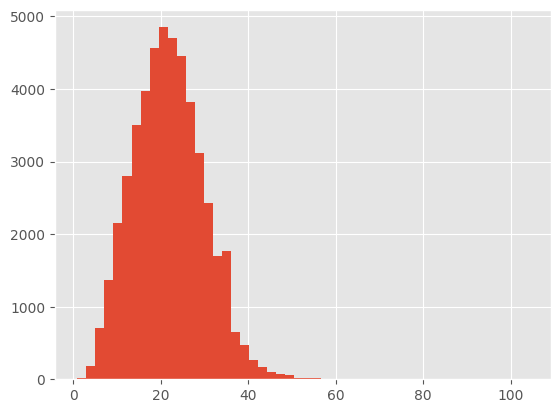

In [ ]:
#Lets visualize how the sentences are distributed by their length
plt.style.use("ggplot")
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [ ]:
#longest sentence length in the dataset
maxlen = max([len(s) for s in sentences])
print ('Maximum sentence length:', maxlen)

Maximum sentence length: 104


In [ ]:
#Words tagged as B-org
data.loc[data['labels'] == 'B-org', 'words'].head()

97             Labor
154    International
215             IAEA
234         European
248             U.N.
Name: words, dtype: object

In [ ]:
#Words tagged as I-org
data.loc[data['labels'] == 'I-org', 'words'].head()

98      Party
155    Atomic
156    Energy
157    Agency
235     Union
Name: words, dtype: object

<ipython-input-36-84de3ba34ea7>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


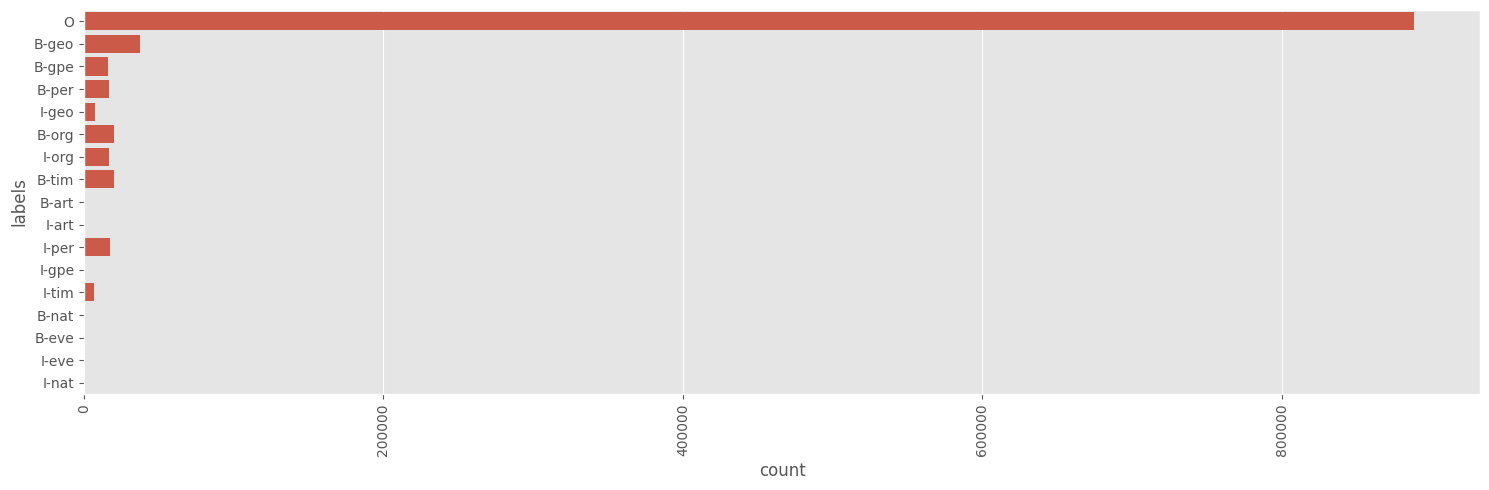

In [ ]:
import seaborn as sns

#Words distribution across Tags

plt.figure(figsize=(15, 5))

ax = sns.countplot(data = data['labels'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

In [ ]:
# Feature set fnct
def word2features(sent, i):
    word = sent[i][0]
    #postag = sent[i][1]

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
     #   'postag': postag,
     #   'postag[:2]': postag[:2],
    }
    if i > 0:
        word1 = sent[i-1][0]
     #   postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
   #         '-1:postag': postag1,
    #        '-1:postag[:2]': postag1[:2],
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1][0]
     #   postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
      #      '+1:postag': postag1,
       #     '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True

    return features



In [ ]:

def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, label in sent]

In [ ]:

%%time

X = [sent2features(s) for s in sentences]
y = [sent2labels(s) for s in sentences]

In [ ]:
#Creating the train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
print(len(X_train) , len(y_train), len(X_test), len(y_test))

In [ ]:
X_val = X_test.copy()
y_val = y_test.copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=0)


In [ ]:
print(len(X_train) , len(y_train), len(X_test), len(y_test),len(X_val), len(y_val))

In [ ]:
%%time
crf = sklearn_crfsuite.CRF(algorithm='lbfgs',
          c1=0.1,
          c2=0.1,
          max_iterations=1000,
          all_possible_transitions=False)
try:
    crf.fit(X_train, y_train)
except AttributeError:
    pass
predictions = crf.predict(X_test)

CPU times: user 19min, sys: 5.93 s, total: 19min 6s
Wall time: 19min 22s


In [ ]:
y_train_pred = crf.predict(X_train)
y_test_pred = crf.predict(X_test)
y_val_pred = crf.predict(X_val)

In [ ]:
labels = list(crf.classes_)
labels

In [ ]:
print("Train F1-score:", metrics.flat_f1_score(y_train,y_train_pred, average='macro',labels=labels))
print("Test F1-score:", metrics.flat_f1_score(y_test,y_test_pred, average='macro',labels=labels))
print("Validation F1-score:", metrics.flat_f1_score(y_val,y_val_pred, average='weighted',labels=labels))



Train F1-score: 0.88538602849107
Test F1-score: 0.6295428299576049
Validation F1-score: 0.9687361904875875


In [ ]:
%%time
print("Model evaluation metrics for train dataset")
print(flat_classification_report(y_pred=y_train_pred, y_true=y_train))

print("Model evaluation metrics for test dataset")
print(flat_classification_report(y_pred=y_test_pred, y_true=y_test))

print("Model evaluation metrics for Val dataset")
print(flat_classification_report(y_pred=y_val_pred, y_true=y_val))

##report = flat_classification_report(y_pred=pred, y_true=y)
#print(report)

Model evaluation metrics for train dataset
              precision    recall  f1-score   support

       B-art       0.92      0.68      0.78       247
       B-eve       0.87      0.73      0.79       193
       B-geo       0.91      0.95      0.93     24009
       B-gpe       0.98      0.96      0.97     10106
       B-nat       0.88      0.67      0.76       126
       B-org       0.92      0.85      0.89     12945
       B-per       0.95      0.93      0.94     10918
       B-tim       0.96      0.93      0.95     12922
       I-art       0.95      0.79      0.86       183
       I-eve       0.87      0.75      0.80       157
       I-geo       0.91      0.93      0.92      4713
       I-gpe       0.99      0.67      0.80       122
       I-nat       0.96      0.76      0.85        29
       I-org       0.95      0.94      0.94     10688
       I-per       0.94      0.96      0.95     11032
       I-tim       0.94      0.90      0.92      4121
           O       1.00      1.00     

In [ ]:
def print_transitions(trans_features):
    for (label_from, label_to), weight in trans_features:
        print("%-6s -> %-7s %0.6f" % (label_from, label_to, weight))

In [ ]:
from collections import Counter

In [ ]:
print("Top likely transitions:")
print_transitions(Counter(crf.transition_features_).most_common(20))

Top likely transitions:
B-geo  -> I-geo   12.169285
B-per  -> I-per   11.626877
B-tim  -> I-tim   10.135371
I-per  -> I-per   9.459382
I-geo  -> I-geo   9.290563
B-org  -> I-org   9.227148
I-tim  -> I-tim   9.097124
I-org  -> I-org   8.980181
B-art  -> I-art   7.753820
I-eve  -> I-eve   7.598324
I-art  -> I-art   7.528331
B-eve  -> I-eve   7.215390
O      -> B-per   6.874019
B-nat  -> I-nat   6.350902
B-gpe  -> I-gpe   6.310354
O      -> B-tim   5.636777
O      -> B-org   5.626709
I-gpe  -> I-gpe   5.313979
O      -> O       5.256330
B-per  -> B-org   5.168658


In [ ]:
print("\nTop unlikely transitions:")
print_transitions(Counter(crf.transition_features_).most_common()[-20:])



Top unlikely transitions:
B-org  -> O       0.486613
I-gpe  -> B-per   0.335206
I-tim  -> B-eve   0.288400
I-gpe  -> B-geo   0.262529
I-eve  -> O       0.203654
I-org  -> B-geo   0.196380
B-org  -> B-eve   0.140726
B-art  -> B-geo   0.075363
I-org  -> O       -0.145415
I-tim  -> B-gpe   -0.177432
I-tim  -> O       -0.200704
I-geo  -> B-gpe   -0.316178
I-per  -> B-geo   -0.399709
I-geo  -> O       -0.451601
B-nat  -> O       -0.624926
B-art  -> O       -0.766541
I-gpe  -> O       -0.896696
I-art  -> O       -1.094595
B-eve  -> O       -1.170437
I-nat  -> O       -1.419632


**Observation**: It is very likely that the beginning of a geographical entity (B-geo) will be followed by a token inside geographical entity (I-geo), but transitions to inside of an organization name (I-org) from tokens with other labels are penalized hugely

The CRF model is able to capture the features of the current and previous labels in the sequency, but it cannot Understand the context of forward labels.

**NER tagging by Deep Learning (Keras)**

Here a bi-drectional RNN model approach is being used

In [34]:
from keras.models import Sequential
from keras.layers import Input, Embedding,TimeDistributed, LSTM, Dropout, Bidirectional, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.utils import plot_model, to_categorical

In [53]:
from keras import backend as K

In [35]:
class SentenceGetter(object):

    def __init__(self, dataset, word_col, tag_col, sent_id_col):
        self.n_sent = 1
        self.dataset = dataset
        self.empty = False
        agg_func = lambda s: [
            (w, t) for w,t in zip(s[word_col].values.tolist(), s[tag_col].values.tolist())
        ]
        self.grouped = self.dataset.groupby(sent_id_col).apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None


In [36]:
%%time

getter = SentenceGetter(dataset=data, word_col='words', tag_col='labels', sent_id_col='sentence_id')
sentences = getter.sentences
print(sentences[0])

[('Thousands', 'O'), ('of', 'O'), ('demonstrators', 'O'), ('have', 'O'), ('marched', 'O'), ('through', 'O'), ('London', 'B-geo'), ('to', 'O'), ('protest', 'O'), ('the', 'O'), ('war', 'O'), ('in', 'O'), ('Iraq', 'B-geo'), ('and', 'O'), ('demand', 'O'), ('the', 'O'), ('withdrawal', 'O'), ('of', 'O'), ('British', 'B-gpe'), ('troops', 'O'), ('from', 'O'), ('that', 'O'), ('country', 'O'), ('.', 'O')]
CPU times: user 7.61 s, sys: 454 ms, total: 8.07 s
Wall time: 9.23 s


Number of Sentences: 47959
Maximum sequence length: 104
Number of unique words: 35178


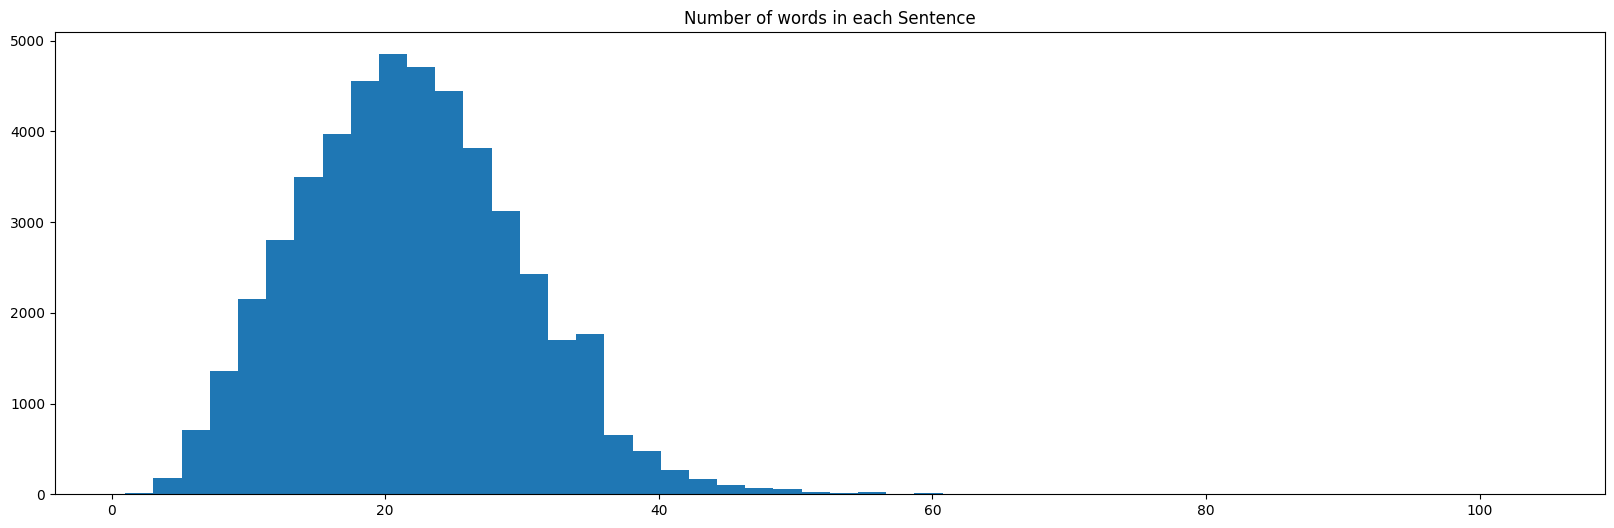

In [37]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.hist([len(s) for s in sentences], bins=50)
ax.set_title('Number of words in each Sentence')

maxlen = max([len(s) for s in sentences])
print('Number of Sentences:', len(sentences))
print ('Maximum sequence length:', maxlen)

words = list(set(data["words"].values))
words.append("ENDPAD")
n_words = len(words)
print('Number of unique words:', n_words)

Number of unique Tags: 17


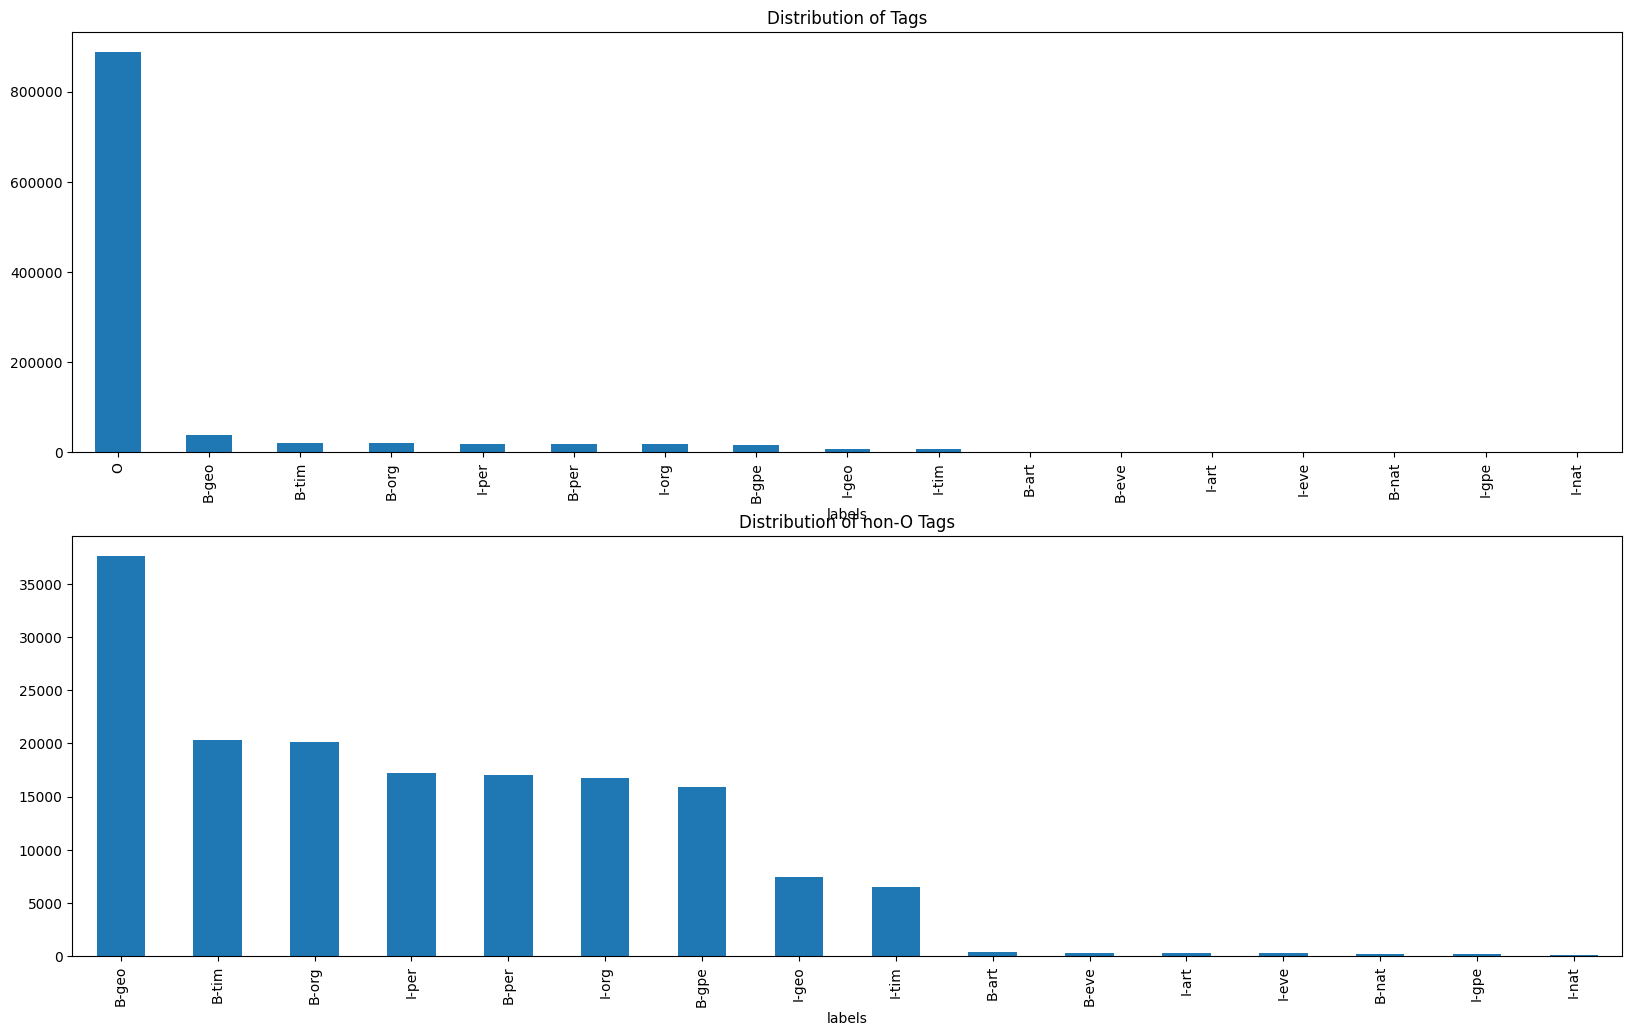

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(20, 12))
data.labels.value_counts().plot.bar(ax=ax[0], title='Distribution of Tags')
data[data.labels != 'O'].labels.value_counts().plot.bar(ax=ax[1], title='Distribution of non-O Tags')

tags = list(set(data["labels"].values))
n_tags = len(tags)
print('Number of unique Tags:', n_tags)

In [39]:
word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [40]:
X = [[word2idx[w[0]] for w in s] for s in sentences]
X = sequence.pad_sequences(maxlen=maxlen, sequences=X, padding="post",value=n_words - 1)

y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = sequence.pad_sequences(maxlen=maxlen, sequences=y, padding="post", value=tag2idx["O"])
y = np.array([to_categorical(i, num_classes=n_tags) for i in y])

print('X shape', X.shape, 'y shape', y.shape)

X shape (47959, 104) y shape (47959, 104, 17)


In [75]:
print(X[0])
print()
print(y[0])

[ 1594 26152 33389 28838 31689 13173 24431 34945  9786 16773 19265 16223
  6830 15008 21689 16773 28622 26152 15484 19731 26162  3532 13292 23475
 35177 35177 35177 35177 35177 35177 35177 35177 35177 35177 35177 35177
 35177 35177 35177 35177 35177 35177 35177 35177 35177 35177 35177 35177
 35177 35177 35177 35177 35177 35177 35177 35177 35177 35177 35177 35177
 35177 35177 35177 35177 35177 35177 35177 35177 35177 35177 35177 35177
 35177 35177 35177 35177 35177 35177 35177 35177 35177 35177 35177 35177
 35177 35177 35177 35177 35177 35177 35177 35177 35177 35177 35177 35177
 35177 35177 35177 35177 35177 35177 35177 35177]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [54]:
##custom function for evaluation metrics ,
##since the new version of keras has dropped the confusion matric from 'metric' functionality

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [55]:
## Defining the parameters
class config():
    VOCAB = n_words
    MAX_LEN = maxlen
    N_OUPUT = n_tags


    EMBEDDING_VECTOR_LENGTH = 50
    N_LSTM_CELLS = 64
    RECURRENT_DROPOUT = 0.1

    OUTPUT_ACTIVATION = 'softmax'

    LOSS = 'categorical_crossentropy'
    OPTIMIZER = 'adam'
    METRICS = ['accuracy',f1_m,precision_m, recall_m]

    MAX_EPOCHS = 5


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 104, 50)           1758900   
                                                                 
 bidirectional_3 (Bidirecti  (None, 104, 128)          58880     
 onal)                                                           
                                                                 
 time_distributed_3 (TimeDi  (None, 104, 17)           2193      
 stributed)                                                      
                                                                 
Total params: 1819973 (6.94 MB)
Trainable params: 1819973 (6.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


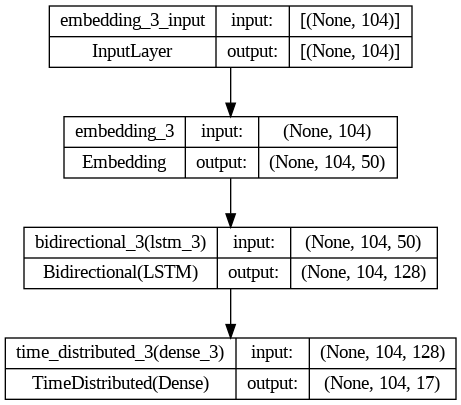

In [57]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)
filepath = "model.h6"
ckpt = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
rlp = ReduceLROnPlateau(monitor='loss', patience=3, verbose=1)

model = Sequential()
model.add(
    Embedding(
        input_dim=config.VOCAB, output_dim=config.EMBEDDING_VECTOR_LENGTH, input_length=config.MAX_LEN
    )
)
model.add(
    Bidirectional(
        LSTM(config.N_LSTM_CELLS, return_sequences=True, recurrent_dropout=config.RECURRENT_DROPOUT)
    )
)
model.add(
    TimeDistributed(
        Dense(config.N_OUPUT, activation=config.OUTPUT_ACTIVATION)
    )
)
model.compile(loss=config.LOSS, optimizer=config.OPTIMIZER, metrics=config.METRICS)

model.summary()
plot_model(model, show_shapes=True)

In [43]:
###Spliting data in train and test
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

In [44]:
###Spliting data in train and val
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size =0.2)

In [45]:
print(x_train.shape,x_test.shape,x_val.shape )
print(y_train.shape,y_test.shape,y_val.shape )


(30693, 104) (9592, 104) (7674, 104)
(30693, 104, 17) (9592, 104, 17) (7674, 104, 17)


In [58]:
##Model Iteration
%%time

history_new = model.fit(x=x_train, y=y_train, validation_data=(x_val,y_val),
    callbacks=[es, ckpt, rlp], epochs=config.MAX_EPOCHS
)

Epoch 1/5
960/960 [==============================] - ETA: 0s - loss: 0.1320 - accuracy: 0.9748 - f1_m: 0.9633 - precision_m: 0.9723 - recall_m: 0.9549
Epoch 1: loss improved from inf to 0.13205, saving model to model.h6
960/960 [==============================] - 279s 282ms/step - loss: 0.1320 - accuracy: 0.9748 - f1_m: 0.9633 - precision_m: 0.9723 - recall_m: 0.9549 - val_loss: 0.0443 - val_accuracy: 0.9883 - val_f1_m: 0.9878 - val_precision_m: 0.9947 - val_recall_m: 0.9809 - lr: 0.0010
Epoch 2/5
960/960 [==============================] - ETA: 0s - loss: 0.0317 - accuracy: 0.9911 - f1_m: 0.9913 - precision_m: 0.9950 - recall_m: 0.9876
Epoch 2: loss improved from 0.13205 to 0.03174, saving model to model.h6
960/960 [==============================] - 275s 286ms/step - loss: 0.0317 - accuracy: 0.9911 - f1_m: 0.9913 - precision_m: 0.9950 - recall_m: 0.9876 - val_loss: 0.0280 - val_accuracy: 0.9919 - val_f1_m: 0.9921 - val_precision_m: 0.9941 - val_recall_m: 0.9901 - lr: 0.0010
Epoch 3/5
96

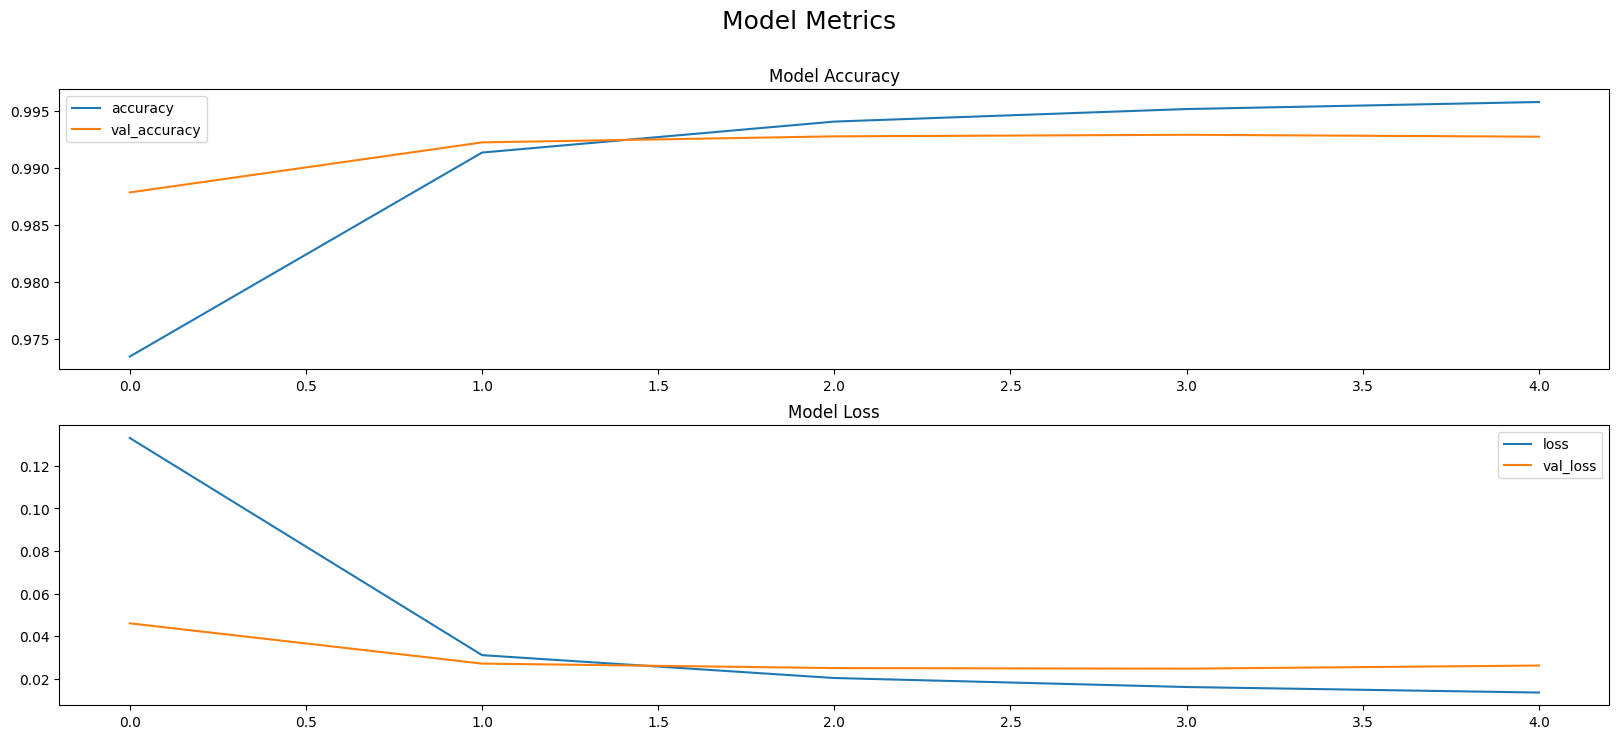

In [59]:
fig, ax = plt.subplots(2, 1, figsize=(20, 8))
df = pd.DataFrame(history.history)
df[['accuracy', 'val_accuracy']].plot(ax=ax[0])
df[['loss', 'val_loss']].plot(ax=ax[1])
ax[0].set_title('Model Accuracy', fontsize=12)
ax[1].set_title('Model Loss', fontsize=12)
fig.suptitle('Model Metrics', fontsize=18);

In [60]:
##Checking the classifications at random
i  = np.random.randint(0, X.shape[0])
p = model.predict(np.array([X[i]]))
p = np.argmax(p, axis=-1)
y_true = np.argmax(y, axis=-1)[i]

print(f"{'Word':15}{'True':5}\t{'Pred'}")
print("-"*30)
for (w, t, pred) in zip(X[i], y_true, p[0]):
    print(f"{words[w]:15}{tags[t]}\t{tags[pred]}")
    if words[w] == 'ENDPAD':
        break

1/1 [==============================] - 0s 457ms/step
Word           True 	Pred
------------------------------
Earlier        O	O
this           O	O
week           O	O
,              O	O
London-based   O	O
dissident      O	O
Saad           B-per	B-per
al-Fagih       I-per	I-per
,              O	O
who            O	O
heads          O	O
the            O	O
Movement       B-org	B-org
for            I-org	I-org
Islamic        I-org	I-org
Reform         I-org	I-org
,              O	O
called         O	O
for            O	O
tens           O	O
of             O	O
thousands      O	O
of             O	O
Saudis         B-gpe	B-gpe
to             O	O
protest        O	O
after          O	O
noon           B-tim	B-tim
prayers        O	O
Thursday       B-tim	B-tim
against        O	O
the            O	O
Saudi          O	O
monarchy       O	O
.              O	O
ENDPAD         O	O


In [64]:
print(history.params)

{'verbose': 1, 'epochs': 5, 'steps': 960}


In [72]:
%%time
# evaluate the model on train
loss, accuracy, f1_score, precision, recall = model.evaluate(x_train, y_train, verbose=1)

###metrics for Train data set
print("Model evaluation metrics for Trains as below")
print("Loss_train:",loss,"Accuracy_train:",accuracy,"F1_score_train :", f1_score,"Precision_train:",precision,"Recall_train:",recall)

960/960 [==============================] - 78s 81ms/step - loss: 0.0109 - accuracy: 0.9965 - f1_m: 0.9966 - precision_m: 0.9971 - recall_m: 0.9961
Model evaluation metrics for Trains as below
Loss_train: 0.010881585069000721 Accuracy_train: 0.9965476989746094 F1_score_train : 0.9966257214546204 Precision_train: 0.9971264600753784 Recall_train: 0.9961260557174683
CPU times: user 1min 10s, sys: 1.55 s, total: 1min 12s
Wall time: 1min 22s


In [73]:
%%time
# evaluate the model on val and test dataset

loss, accuracy, f1_score, precision, recall = model.evaluate(x_val, y_val, verbose=1)
print("Model evaluation metrics for validation set as below")
print("Loss_val:",loss,"Accuracy_val:",accuracy,"F1_score_val :", f1_score,"Precision_val:",precision,"Recall_val:",recall)
print()
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=1)
print("Model evaluation metrics for Test as below")
print("Loss_test:",loss,"Accuracy_test:",accuracy,"F1_score_test :", f1_score,"Precision_test:",precision,"Recall_test:",recall)


240/240 [==============================] - 11s 45ms/step - loss: 0.0256 - accuracy: 0.9928 - f1_m: 0.9930 - precision_m: 0.9938 - recall_m: 0.9921
Model evaluation metrics for validation set as below
Loss_val: 0.025625241920351982 Accuracy_val: 0.9928091168403625 F1_score_val : 0.9929500222206116 Precision_val: 0.9937604665756226 Recall_val: 0.9921396970748901

300/300 [==============================] - 14s 46ms/step - loss: 0.0250 - accuracy: 0.9928 - f1_m: 0.9930 - precision_m: 0.9938 - recall_m: 0.9922
Model evaluation metrics for Test as below
Loss_test: 0.02499471791088581 Accuracy_test: 0.9927904605865479 F1_score_test : 0.992977499961853 Precision_test: 0.9937893748283386 Recall_test: 0.9921681880950928
CPU times: user 38.4 s, sys: 835 ms, total: 39.2 s
Wall time: 41.3 s
